In [1]:
pip install fastapi uvicorn streamlit requests beautifulsoup4 pandas


Данные сохранены в vacancies_data.csv


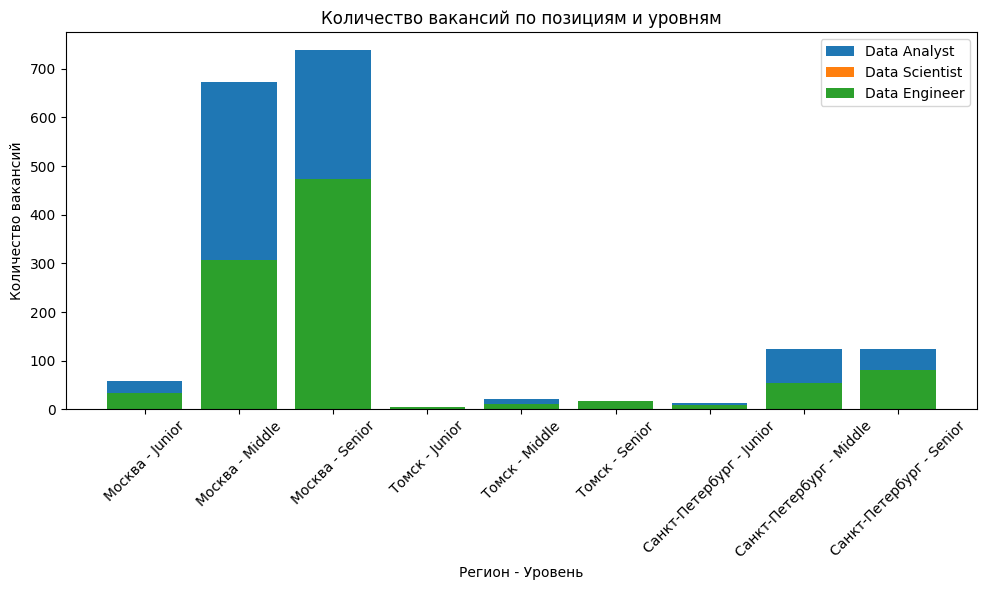

In [6]:
import requests
import pandas as pd
import time
import random
import matplotlib.pyplot as plt

# Функция для получения данных с API HH
def get_hh_vacancies(region_id, position, experience):
    url = "https://api.hh.ru/vacancies"
    params = {
        "text": position,
        "area": region_id,  # Идентификатор региона
        "experience": experience,  # Уровень: noExperience, between1And3, between3And6
        "per_page": 100  # Количество вакансий на странице
    }
    response = requests.get(url, params=params)
    data = response.json()
    return data.get('found', 0)

# Основная функция
def main():
    regions = {
        'Москва': 1,
        'Томск': 1202,
        'Санкт-Петербург': 2
    }

    positions = ['Data Analyst', 'Data Scientist', 'Data Engineer']

    levels = {
        'Junior': 'noExperience',
        'Middle': 'between1And3',
        'Senior': 'between3And6'
    }

    data = []
    for region_name, region_id in regions.items():
        for position in positions:
            for level_name, experience in levels.items():
                job_count = get_hh_vacancies(region_id, position, experience)
                data.append({
                    "region": region_name,
                    "position": position,
                    "level": level_name,
                    "job_count": job_count
                })
                # Задержка между запросами
                time.sleep(random.uniform(1, 3))

    # Преобразование данных в DataFrame
    df = pd.DataFrame(data)

    # Сохраняем данные в CSV
    df.to_csv('vacancies_data.csv', index=False)
    print("Данные сохранены в vacancies_data.csv")

    # Визуализация данных
    plt.figure(figsize=(10, 6))
    for position in positions:
        subset = df[df['position'] == position]
        plt.bar(subset['region'] + ' - ' + subset['level'], subset['job_count'], label=position)

    plt.title('Количество вакансий по позициям и уровням')
    plt.xlabel('Регион - Уровень')
    plt.ylabel('Количество вакансий')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
